# BigData - UAS Prediksi Kemenangan pertandingan catur

## Beserta Tugas-tugas Setelah UTS
### Disusun Oleh : Prayoga (5180411043)
#### Menggunakan metode Naive Bayes Classifier :
#####  - GaussianNB
#####  - CategoricalNB
#####  - Mixed GaussianNB & CategoricalNB

###### Dataset berasal dari https://www.kaggle.com/datasnaek/chess

# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split # untuk split data ke data trin dan data test
from sklearn.metrics import classification_report # untuk model evaluasi matrix
from sklearn.preprocessing import OrdinalEncoder # untuk menyandikan fitur kategori dari string ke array 

import plotly.express as px  # untuk data visualization
import plotly.graph_objects as go # untuk data visualization

# Tipe-Tipe dari Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

# Load Dataset

In [2]:
# Read data csv
df=pd.read_csv('Dataset/games.csv', encoding='utf-8')
# Print 
df.iloc[:,:12]

id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating            black_id  \
0      white           15+2       bourgris          1500                a-00   
1      black           5+10           a-00          1322           skinnerua   
2      white           5+10         ischia          1496                a-00   
3      white           20+0  daniamurashov          1439        adivanov2009   
4      white           30+3      nik221107          1523        adivanov2009   
...      ...            ...            ...           ...                 ...   
20053  white          10+10        belcolt          1691            jamboger   
20054  black           10+0       jamboger          1233  farrukhasomiddinov   
20055  white           10+0       jamboger          1219        schaaksmurf3   
20056  white           10+0   marcodisogno          1360            jamboger   
20057  black           10+0       jamboger          1235               ffbob   

       black_rating  
0              1191  
1              1261  
2              1500  
3              1454  
4              1469  
...             ...  
20053          1220  
20054          1196  
20055          1286  
20056          1227  
20057          1339  

[20058 rows x 12 columns]

# Membuat Field 'Winner' sebagai target variable

In [3]:
df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

# Menambah 3 fields baru untuk model

In [4]:
# Perbandingan antara white rating and black rating 
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) 
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)

# Match outcome (1=white wins, 0=draw, -1=black wins) 
df['match_outcome']=df['winner'].apply(lambda x: 1 if x=='white' else 
                                       0 if x=='draw' else -1)

# Print - Periksa dengan mencetak beberapa kolom terakhir dalam data frame
df.iloc[:,13:]

opening_eco                            opening_name  opening_ply  \
0             D10        Slav Defense: Exchange Variation            5   
1             B00  Nimzowitsch Defense: Kennedy Variation            4   
2             C20   King's Pawn Game: Leonardis Variation            3   
3             D02  Queen's Pawn Game: Zukertort Variation            3   
4             C41                        Philidor Defense            5   
...           ...                                     ...          ...   
20053         A80                           Dutch Defense            2   
20054         A41                            Queen's Pawn            2   
20055         D00         Queen's Pawn Game: Mason Attack            3   
20056         B07                            Pirc Defense            4   
20057         D00         Queen's Pawn Game: Mason Attack            3   

       rating_difference  white_win  match_outcome  
0                    309          1              1  
1                     61          0             -1  
2                     -4          1              1  
3                    -15          1              1  
4                     54          1              1  
...                  ...        ...            ...  
20053                471          1              1  
20054                 37          0             -1  
20055                -67          1              1  
20056                133          1              1  
20057               -104          0             -1  

[20058 rows x 6 columns]

# GaussianNB dengan 2 variables Independent

In [5]:
# Membuat fungsi untuk pemisahan sample, pemasangan model dan print
def mfunc(X, y, typ):
    
    # Membuat train data dan test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit model
    model = typ
    clf = model.fit(X_train, y_train)

    # Memprediksi label kelas pada data uji
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # label kelas yang diketahui oleh pengklasifikasi
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # probabilitas sebelumnya dari setiap kelas.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) 
        
    # metode skor untuk mendapatkan akurasi model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # laporan klasifikasi untuk mengevaluasi model
    print(classification_report(y_test, pred_labels))
    
    
    return X_train, X_test, y_train, y_test, clf, pred_labels

# Membuat 2 model variables independent ('rating_difference' & 'turns')

In [6]:
# NOTE !

# Mohon maaf saya agak curang di sini karena jumlah total gerakan ('turns') 
# hanya akan diketahui setelah pertandingan selesai.
# 'turns' tidak mungkin bisa didapat jika kami membuat prediksi sebelum pertandingan dimulai.
# namun, ini hanya untuk tujuan ilustrasi, jadi saya akan tetap menggunakannya. GO AHEAD  hehe. 


# Pilih data untuk model
X=df[['rating_difference', 'turns']]

# white_win sebagai target
y=df['white_win'].values

# Sesuaikan model dan cetak hasilnya
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.50062321 0.49937679]
--------------------------------------------------------
Accuracy Score:  0.6625124626121635
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2024
           1       0.67      0.63      0.65      1988

    accuracy                           0.66      4012
   macro avg       0.66      0.66      0.66      4012
weighted avg       0.66      0.66      0.66      4012



### Accuracy mencapai 66%

# Deceision Boundary untuk Naive bayes Model

In [7]:
# membuat ukuran jaring yang akan digunakan
mesh_size = 5
margin = 1

# Buat grid mesh di mana kita akan menjalankan model kita
x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Buat pengklasifikasi, jalankan prediksi di grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Menentukan jejak
trace_specs = [
    #[X_train, y_train, 0, 'Train', 'brown'],
    #[X_train, y_train, 1, 'Train', 'aqua'],
    [X_test, y_test, 0, 'Test', 'red'],
    [X_test, y_test, 1, 'Test', 'blue']
]

# Bangun grafik menggunakan trace_specs
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label].iloc[:, 0], y=X[y==label].iloc[:, 1],
        name=f'{split} data, Actual Class: {label}',
        mode='markers', marker_color=marker
    )
    for X, y, label, split, marker in trace_specs
])

#  marker size
fig.update_traces(marker_size=2, marker_line_width=0)

#  axis range
fig.update_xaxes(range=[-1600, 1500])
fig.update_yaxes(range=[0,345])

# Judul
fig.update_layout(title_text="Decision Boundary untuk Naive Bayes Model", 
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

# Grafik kontur
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=True,
        colorscale='tealrose',
        opacity=1,
        name='Score',
        hoverinfo='skip'
    )
)

fig.show()

# GaussianNB dengan 3 label/class dan 2 variables independent
### Menggunakan 2 variables independent yang sama.
### Namun mengubah variable target menjadi 'match_outcome'.
#### -1 = black_wins
#### 0 = draw
#### 1 = white_wins

In [8]:
# Pilih data untuk modeling
X=df[['rating_difference', 'turns']]
y=df['match_outcome'].values

# Fi model dan print
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, GaussianNB())

Classes:  [-1  0  1]
Class Priors:  [0.45232457 0.04829864 0.49937679]
--------------------------------------------------------
Accuracy Score:  0.6311066799601196
--------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.63      0.61      0.62      1849
           0       0.18      0.07      0.10       175
           1       0.64      0.70      0.67      1988

    accuracy                           0.63      4012
   macro avg       0.49      0.46      0.47      4012
weighted avg       0.62      0.63      0.62      4012



### Accuracy mencapai 63%

# CategoricalNB dengan 2 variables Independent  ('opening_eco' & 'white_id')

In [9]:
# Pilih data untuk modeling
X=df[['opening_eco', 'white_id']]
y=df['white_win'].values

# Encode categorical variables
enc = OrdinalEncoder()
X = enc.fit_transform(X)

# Fit model dan print
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, CategoricalNB())

Classes:  [0 1]
Class Log Priors:  [-0.69190154 -0.69439437]
--------------------------------------------------------
Accuracy Score:  0.6011964107676969
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      2024
           1       0.60      0.60      0.60      1988

    accuracy                           0.60      4012
   macro avg       0.60      0.60      0.60      4012
weighted avg       0.60      0.60      0.60      4012



### Accuracy mencapai 60%

# Mixed NB(Gaussian & Categorial)

### Bagian 1

In [10]:
# menjadikan kuartil 20%
df['rating_difference_qt'] = pd.qcut(df['rating_difference'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])
df['turns_qt'] = pd.qcut(df['turns'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])

# Pilih Data untuk modeling
X=df[['opening_eco', 'white_id', 'rating_difference_qt', 'turns_qt']]
y=df['white_win'].values

# Categorical variables
enc = OrdinalEncoder()
X = enc.fit_transform(X)

# Fit model dan print hasil
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, CategoricalNB())

Classes:  [0 1]
Class Log Priors:  [-0.69190154 -0.69439437]
--------------------------------------------------------
Accuracy Score:  0.6542871385842473
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2024
           1       0.66      0.63      0.64      1988

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012



### Dari combine antara Gaussian+Categorial Accuracy mencapai 65%

### Bagian 2

In [11]:
# ----- Persiapan -----
# Pilih Data untuk modeling
X_G=df[['rating_difference', 'turns']] # Gaussian
X_C=df[['opening_eco', 'white_id']] # Categorical
y=df['white_win'].values

# categorical variables
enc = OrdinalEncoder()
X_C = enc.fit_transform(X_C)

# Gabungkan keempat variabel menjadi satu array
X=np.c_[X_G, X_C[:,0].ravel(), X_C[:,1].ravel()]

# Buat sampel train data dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# ----- Gabungan 2 model -----
# Sekarang gunakan model Gaussian untuk variabel 
model_G = GaussianNB()
clf_G = model_G.fit(X_train[:,0:2], y_train)
# Model categorical untuk variabel 
model_C = CategoricalNB()
clf_C = model_C.fit(X_train[:,2:4], y_train)


# ----- Dapatkan prediksi probabilitas dari setiap model -----
# training data
G_train_probas = model_G.predict_proba(X_train[:,0:2])
C_train_probas = model_C.predict_proba(X_train[:,2:4])
# testing data
G_test_probas = model_G.predict_proba(X_test[:,0:2])
C_test_probas = model_C.predict_proba(X_test[:,2:4])

# Gabungkan prediksi probabilitas untuk kelas=1 dari kedua model menjadi matriks
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test


# ----- Pasang model Gaussian di X_new -----
model = GaussianNB()
clf = model.fit(X_new_train, y_train)

# Memprediksi label kelas pada data uji
pred_labels = model.predict(X_new_test)


# ----- Print -----
print('Classes: ', clf.classes_) # label kelas yang diketahui oleh pengklasifikasi
print('Class Priors: ',clf.class_prior_) # peluang tiap kelas
# metode skor untuk mendapatkan akurasi model
print('--------------------------------------------------------')
score = model.score(X_new_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')

print(classification_report(y_test, pred_labels))

Classes:  [0 1]
Class Priors:  [0.50062321 0.49937679]
--------------------------------------------------------
Accuracy Score:  0.6358424725822532
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      2024
           1       0.64      0.62      0.63      1988

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.64      4012
weighted avg       0.64      0.64      0.64      4012



### meskipun hasil model tidak sebaik yang sebelumnya, penggabungan ini bekerja relatif baik dengan akurasi 63%

#### Mungkin bisa dengan menggunakan penggabungan model lainnya untuk dapat menghasilkan accuracy yang baik dan di sesuaikan  dengan kasus yang ingin di selesaikan. Atau bisa juga untuk dapat mengulangi proses dari data preproscesing dan mencoba menambah algoritma boosting untuk menaian akurasi seperti AdaBoost atau Information Gain.

# Confusion Matrix dengan Dataset sendiri

In [12]:
from numpy.random import randn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
#from pandas.core import datetools
import seaborn as sns
from IPython.display import display, Math, Latex
#from numpy.random import randn
%matplotlib inline

In [13]:
Actual_Cat=[5,3,0]
Actual_Dog=[2,3,1]
Actual_Rabbit=[0,2,11]
Predicted_Cat=[5,2,0]
Predicted_Dog=[3,3,2]
Predicted_Rabbit=[0,1,11]

In [14]:
Wiki_Example_1=pd.DataFrame(np.array([5,2,0,3,3,2,0,1,11]).reshape(3,3),index=[
    ['Predicted','Predicted','Predicted'],
    ['Cat','Dog','Rabbit']],columns=[['Actual','Actual','Actual'],
    ['Cat','Dog','Rabbit']])

In [15]:
Wiki_Example_1

Actual           
                    Cat Dog Rabbit
Predicted Cat         5   2      0
          Dog         3   3      2
          Rabbit      0   1     11

In [16]:
pd.DataFrame({'Actual_Cat':Actual_Cat,'Actual_Dog':Actual_Dog,'Actual_Rabbit':Actual_Rabbit,
              'Predicted_Cat':Predicted_Cat,
              'Predicted_Dog':Predicted_Dog,'Predicted_Rabbit':Predicted_Rabbit })

Actual_Cat  Actual_Dog  Actual_Rabbit  Predicted_Cat  Predicted_Dog  \
0           5           2              0              5              3   
1           3           3              2              2              3   
2           0           1             11              0              2   

   Predicted_Rabbit  
0                 0  
1                 1  
2                11

In [17]:
Wiki_Example_2=pd.DataFrame(np.array(
    ['5 True Positive','2 False Positives','3 False Negatives','17 True Negatives']).reshape(2,2),index=[
    ['Actual','Actual'],['Cat','Non-Cat']],columns=[['Predicted','Predicted'],['Cat','Non-Cat']])
Wiki_Example_2

Predicted                   
                              Cat            Non-Cat
Actual Cat        5 True Positive  2 False Positives
       Non-Cat  3 False Negatives  17 True Negatives

In [18]:


Wiki_Example_2=pd.DataFrame(np.array([5,2,3,17]).reshape(2,2),index=[
    ['Actual','Actual'],['Cat','Non-Cat']],columns=[['Predicted','Predicted'],['Cat','Non-Cat']])

Wiki_Example_2

Predicted        
                     Cat Non-Cat
Actual Cat             5       2
       Non-Cat         3      17

In [19]:
Conf_Matrix=['True Positive, Power','False Positive, Type 1 Error','False Negative=Type 2 Error','True Negative']
Wiki_Example_2=pd.DataFrame(np.array(Conf_Matrix).reshape(2,2),index=[['Predicted Condition','Predicted Condition'],
                                                                      ['Predicted Positive','Predicted Negative']],
                                                                        columns=[
    ['True Condition','True Condition'],['Condition Positive','Condition Negative']])

Wiki_Example_2

True Condition  \
                                                 Condition Positive   
Predicted Condition Predicted Positive         True Positive, Power   
                    Predicted Negative  False Negative=Type 2 Error   

                                                                      
                                                  Condition Negative  
Predicted Condition Predicted Positive  False Positive, Type 1 Error  
                    Predicted Negative                 True Negative

In [20]:
Wiki_Example_3=pd.DataFrame(np.array([5,2,7,
                                      3,17,20,
                                     8,19,27]).reshape(3,3),index=[
    ['Sebenarnya','Sebenarnya','Sebenarnya'],['Cat','Non-Cat','Total']],columns=[
    ['prediksi','prediksi','prediksi'],['Cat','Non-Cat','Total']])
Wiki_Example_3

prediksi              
                        Cat Non-Cat Total
Sebenarnya Cat            5       2     7
           Non-Cat        3      17    20
           Total          8      19    27

# Confusion Matrix dengan Dataset 

In [21]:
# import data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=pd.read_csv("Dataset/data.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

# Cleaning Dataset

In [22]:
# Clean the dataset
data.drop(["Unnamed: 32", "id"],axis=1,inplace=True)

In [23]:
data.diagnosis = [0 if each == "B" else 1 for each in data.diagnosis ]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [24]:
x = (x_data - np.min(x_data)) / (np.max(x_data) -  np.min(x_data)).values

# Spliting Data Train & Dat Test

In [25]:
# Dataset train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

# Membuat Model Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # estimators = number of trees 
# random_state = number of samples, we define the number to not have  problem in our other predictions ( random = default )
rf.fit(x_train,y_train)
print("Random forest score(accuracy): ", rf.score(x_test,y_test))

Random forest score(accuracy):  0.9534883720930233


# Hasil Confusioni Matrix

In [27]:
# CONFUSION MATRIX CONTROL
y_prediction = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_prediction)
cm

array([[53,  1],
       [ 3, 29]], dtype=int64)

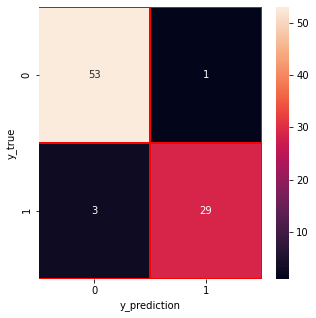

In [28]:
f, ax= plt.subplots(figsize=(5,5)) #figure size 5,5
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()

# Tugas - tugas Setelah UTS

## Firts Load

In [41]:
#cek versi findspark dan pyspark
import findspark, pyspark

print(findspark.__version__)
print(pyspark.__version__)

1.4.2
3.1.2


In [42]:
# import module/package yg dibutuhkan
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# membuat session untuk akses semua function spark dan DataFrame API
sc = SparkContext.getOrCreate()
spark = SparkSession \
    .builder \
    .appName("DataFrame Spark") \
    .config("some.config.option.spark", "some-value") \
    .getOrCreate()

# definisikan skema dari data yg akan dibaca
skemaPembelian = StructType([
    StructField("Tanggal", DateType(), True),
    StructField("Jam", StringType(), True),
    StructField("Kota", StringType(), True),
    StructField("Item", StringType(), True),
    StructField("Total", FloatType(), True),
    StructField("Pembayaran", StringType(), True),
])

# baca file .csv menggunakan skemaPembelian tadi dan dengan pemisah kolom "tab" (\t)
dataframePembelian = spark.read.csv(
    "Dataset/customers.csv",
    header=True, schema=skemaPembelian, sep="\t")

# menampilkan 10 baris DataFrame dengan jumlah > 300
dataframePembelian.filter(dataframePembelian['Total'] > 300).show(10)

+-------+---+----+----+-----+----------+
|Tanggal|Jam|Kota|Item|Total|Pembayaran|
+-------+---+----+----+-----+----------+
+-------+---+----+----+-----+----------+



## Regresi di Spark Dataset Fights

In [149]:
#mengimport modul yang dibutuhkan
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import os
os.environ["PYSPARK_PYTHON"]="python3"


#membuat SparkSession
sc = SparkContext.getOrCreate()
appName = "Regresi di Spark"
spark = SparkSession \
    .builder \
    .appName(appName) \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [150]:
#membuat skema file
flightSchema = StructType([
  StructField("DayofMonth", IntegerType(), False),
  StructField("DayOfWeek", IntegerType(), False),
  StructField("Carrier", StringType(), False),
  StructField("OriginAirportID", IntegerType(), False),
  StructField("DestAirportID", IntegerType(), False),
  StructField("DepDelay", IntegerType(), False),
  StructField("ArrDelay", IntegerType(), False),
])
#membaca data dari file ke DataFrame
flightDataFrame = spark.read.csv('dataset/flights.csv', 
                                 schema=flightSchema, header=True)
flightDataFrame.show(3)

+----------+---------+-------+---------------+-------------+--------+--------+
|DayofMonth|DayOfWeek|Carrier|OriginAirportID|DestAirportID|DepDelay|ArrDelay|
+----------+---------+-------+---------------+-------------+--------+--------+
|        19|        5|     DL|          11433|        13303|      -3|       1|
|        19|        5|     DL|          14869|        12478|       0|      -8|
|        19|        5|     DL|          14057|        14869|      -4|     -15|
+----------+---------+-------+---------------+-------------+--------+--------+
only showing top 3 rows



In [151]:
#memilih kolom data yang terkait
data = flightDataFrame.select("DayofMonth", "DayOfWeek", 
                              "OriginAirportID", "DestAirportID", 
                              "DepDelay", "ArrDelay")
data.show(3)

+----------+---------+---------------+-------------+--------+--------+
|DayofMonth|DayOfWeek|OriginAirportID|DestAirportID|DepDelay|ArrDelay|
+----------+---------+---------------+-------------+--------+--------+
|        19|        5|          11433|        13303|      -3|       1|
|        19|        5|          14869|        12478|       0|      -8|
|        19|        5|          14057|        14869|      -4|     -15|
+----------+---------+---------------+-------------+--------+--------+
only showing top 3 rows



In [152]:
#membagi data secara random, 70% untuk training, 30% untuk testing
dataTerpisahkan = data.randomSplit([0.7, 0.3]) 
trainingData = dataTerpisahkan[0] #data training di index 0
testingData = dataTerpisahkan[1] #data testing di index 1
train_rows = trainingData.count()
test_rows = testingData.count()
print ("Training Rows:", train_rows, " Testing Rows:", test_rows)

Training Rows: 1891995  Testing Rows: 810223


In [153]:
#mendefinisikan assembler
assembler = VectorAssembler(inputCols = [
    "DayofMonth", "DayOfWeek", "OriginAirportID", "DestAirportID", 
    "DepDelay"], outputCol="features")
#mengubah data kita menjadi feature satu kolom, 
#menggunakan assembler yang kita definisikan
trainingDataFinal = assembler.transform(trainingData).select(
    col("features"), (col("ArrDelay").cast("Int").alias("label")))
trainingDataFinal.show(truncate=False , n=3)

+------------------------------+-----+
|features                      |label|
+------------------------------+-----+
|[1.0,1.0,10140.0,10397.0,-4.0]|-11  |
|[1.0,1.0,10140.0,10397.0,-2.0]|-17  |
|[1.0,1.0,10140.0,10821.0,8.0] |-9   |
+------------------------------+-----+
only showing top 3 rows



In [154]:
#memanggil API regresi linear dari Spark untuk algoritma kita
algoritma = LinearRegression(
    labelCol="label",featuresCol="features", maxIter=10, regParam=0.3)
#mentraining model kita dengan training data final
model = algoritma.fit(trainingDataFinal)
print ("Model regresi selesai ditraining!")

Model regresi selesai ditraining!


In [155]:
#mengubah data ke satu kolom fitur menggunakan assembler 
#yg telah kita definisikan sblmnya
testingDataFinal = assembler.transform(
    testingData).select(
    col("features"), (col("ArrDelay")).cast("Int").alias("trueLabel"))
testingDataFinal.show(truncate=False, n=2)

+------------------------------+---------+
|features                      |trueLabel|
+------------------------------+---------+
|[1.0,1.0,10140.0,11259.0,-3.0]|-11      |
|[1.0,1.0,10140.0,11259.0,0.0] |-10      |
+------------------------------+---------+
only showing top 2 rows



In [156]:
#memprediksi data testing final dengan model yg telah kita training
predisksiMentah = model.transform(testingDataFinal)
#memilih kolom tertentu, yang terkait saja
prediksiFinal = predisksiMentah.select("features", "prediction", "trueLabel")
prediksiFinal.show(3)#menampilkan 3 hasil prediksi

+--------------------+-------------------+---------+
|            features|         prediction|trueLabel|
+--------------------+-------------------+---------+
|[1.0,1.0,10140.0,...|-6.7370274942846775|      -11|
|[1.0,1.0,10140.0,...| -3.746078371483123|      -10|
|[1.0,1.0,10140.0,...| -5.747870393439136|       -5|
+--------------------+-------------------+---------+
only showing top 3 rows



In [157]:
#mengimpor modul untuk mengevaluasi akurasi regresi kita
from pyspark.ml.evaluation import RegressionEvaluator
#mendefinisikan evaluator dengan menginputkan kolom dari "label" 
#dan "prediksi" data kita, serta matrik evaluasi yg kita inginkan (rmse)
evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
#menghitung rmse dg evalutor yang telah kita definisikan
rmse = evaluator.evaluate(prediksiFinal)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 13.20874005939461


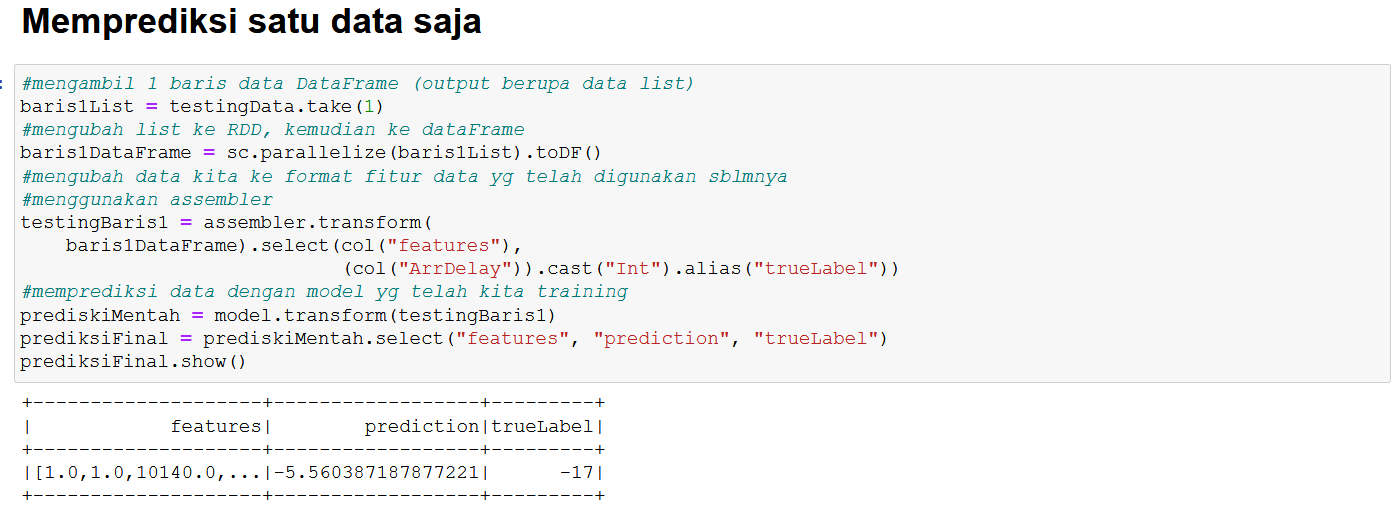

## Menampilkan 5 data latih 

In [166]:
#membagi data secara random, 70% untuk training, 30% untuk testing
dataTerpisahkan = data.randomSplit([0.7, 0.3]) 
DataLatih = dataTerpisahkan[0] #data training di index 0

DataLatih.show(5)

+----------+---------+---------------+-------------+--------+--------+
|DayofMonth|DayOfWeek|OriginAirportID|DestAirportID|DepDelay|ArrDelay|
+----------+---------+---------------+-------------+--------+--------+
|         1|        1|          10140|        10397|      -2|     -17|
|         1|        1|          10140|        11259|      -3|     -11|
|         1|        1|          10140|        11259|      -2|     -14|
|         1|        1|          10140|        11259|      -1|     -11|
|         1|        1|          10140|        11259|       0|     -12|
+----------+---------+---------------+-------------+--------+--------+
only showing top 5 rows



## Menampilkan 4 data uji 

In [168]:
#membagi data secara random, 70% untuk training, 30% untuk testing
dataTerpisahkan = data.randomSplit([0.7, 0.3]) 
DataUji = dataTerpisahkan[1] #data testing di index 1

DataUji.show(4)

+----------+---------+---------------+-------------+--------+--------+
|DayofMonth|DayOfWeek|OriginAirportID|DestAirportID|DepDelay|ArrDelay|
+----------+---------+---------------+-------------+--------+--------+
|         1|        1|          10140|        10821|       8|      -9|
|         1|        1|          10140|        11259|      -2|     -14|
|         1|        1|          10140|        11259|       0|     -12|
|         1|        1|          10140|        11259|      21|      19|
+----------+---------+---------------+-------------+--------+--------+
only showing top 4 rows



In [170]:
# Menyiapkan data training

#mendefinisikan assembler
assembler = VectorAssembler(inputCols = [
    "DayofMonth", "DayOfWeek", "OriginAirportID", "DestAirportID", 
    "DepDelay"], outputCol="features")
#mengubah data kita menjadi feature satu kolom, 
#menggunakan assembler yang kita definisikan
trainingDataFinal = assembler.transform(trainingData).select(
    col("features"), (col("ArrDelay").cast("Int").alias("label")))
trainingDataFinal.show(truncate=False , n=3)

+------------------------------+-----+
|features                      |label|
+------------------------------+-----+
|[1.0,1.0,10140.0,10397.0,-4.0]|-11  |
|[1.0,1.0,10140.0,10397.0,-2.0]|-17  |
|[1.0,1.0,10140.0,10821.0,8.0] |-9   |
+------------------------------+-----+
only showing top 3 rows



In [171]:
# Training model regresi kita

#memanggil API regresi linear dari Spark untuk algoritma kita
algoritma = LinearRegression(
    labelCol="label",featuresCol="features", maxIter=10, regParam=0.3)
#mentraining model kita dengan training data final
model = algoritma.fit(trainingDataFinal)
print ("Model regresi selesai ditraining!")

Model regresi selesai ditraining!


## Menampilkan Koefisien dan Konstanta Regresi

In [193]:
print("Nilai Koefisien Regresi = " + str(model.coefficients))
print("Nilai Konstanta Regresi = " + str(model.intercept))

Nilai Koefisien Regresi = [-0.00026328148258937756,-0.00011486891457418885]
Nilai Konstanta Regresi = 11.49644672098165


In [173]:
# Menyiapkan data testing

#mengubah data ke satu kolom fitur menggunakan assembler 
#yg telah kita definisikan sblmnya
testingDataFinal = assembler.transform(
    testingData).select(
    col("features"), (col("ArrDelay")).cast("Int").alias("trueLabel"))
testingDataFinal.show(truncate=False, n=2)

+------------------------------+---------+
|features                      |trueLabel|
+------------------------------+---------+
|[1.0,1.0,10140.0,11259.0,-3.0]|-11      |
|[1.0,1.0,10140.0,11259.0,0.0] |-10      |
+------------------------------+---------+
only showing top 2 rows



In [174]:
# Memprediksi hasil regresi dengan model yang telah kita training

#memprediksi data testing final dengan model yg telah kita training
predisksiMentah = model.transform(testingDataFinal)
#memilih kolom tertentu, yang terkait saja
prediksiFinal = predisksiMentah.select("features", "prediction", "trueLabel")
prediksiFinal.show(3)#menampilkan 3 hasil prediksi

+--------------------+-------------------+---------+
|            features|         prediction|trueLabel|
+--------------------+-------------------+---------+
|[1.0,1.0,10140.0,...|-6.7370274942846775|      -11|
|[1.0,1.0,10140.0,...| -3.746078371483123|      -10|
|[1.0,1.0,10140.0,...| -5.747870393439136|       -5|
+--------------------+-------------------+---------+
only showing top 3 rows



In [175]:
# Mengukur akurasi dari model regresi kita

#mengimpor modul untuk mengevaluasi akurasi regresi kita
from pyspark.ml.evaluation import RegressionEvaluator
#mendefinisikan evaluator dengan menginputkan kolom dari "label" 
#dan "prediksi" data kita, serta matrik evaluasi yg kita inginkan (rmse)
evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
#menghitung rmse dg evalutor yang telah kita definisikan
rmse = evaluator.evaluate(prediksiFinal)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 13.20874005939461


## Mengubah Banyaknya Variabel Bebas (Hanya 2)

In [177]:
# menyiapkan data training
#mendefinisikan assembler
assembler = VectorAssembler(inputCols = [
    "OriginAirportID", "DestAirportID"], outputCol="features")
#mengubah data kita menjadi feature satu kolom, 
#menggunakan assembler yang kita definisikan
trainingDataFinal = assembler.transform(trainingData).select(
    col("features"), (col("ArrDelay").cast("Int").alias("label")))
trainingDataFinal.show(truncate=False , n=3)

+-----------------+-----+
|features         |label|
+-----------------+-----+
|[10140.0,10397.0]|-11  |
|[10140.0,10397.0]|-17  |
|[10140.0,10821.0]|-9   |
+-----------------+-----+
only showing top 3 rows



In [178]:
# Training model regresi kita

#memanggil API regresi linear dari Spark untuk algoritma kita
algoritma = LinearRegression(
    labelCol="label",featuresCol="features", maxIter=10, regParam=0.3)
#mentraining model kita dengan training data final
model = algoritma.fit(trainingDataFinal)
print ("Model regresi selesai ditraining!")

Model regresi selesai ditraining!


In [179]:
# Menyiapkan data testing

#mengubah data ke satu kolom fitur menggunakan assembler 
#yg telah kita definisikan sblmnya
testingDataFinal = assembler.transform(
    testingData).select(
    col("features"), (col("ArrDelay")).cast("Int").alias("trueLabel"))
testingDataFinal.show(truncate=False, n=2)

+-----------------+---------+
|features         |trueLabel|
+-----------------+---------+
|[10140.0,11259.0]|-11      |
|[10140.0,11259.0]|-10      |
+-----------------+---------+
only showing top 2 rows



In [180]:
#memprediksi data testing final dengan model yg telah kita training
predisksiMentah = model.transform(testingDataFinal)
#memilih kolom tertentu, yang terkait saja
prediksiFinal = predisksiMentah.select("features", "prediction", "trueLabel")
prediksiFinal.show(5)#menampilkan 3 hasil prediksi

+-----------------+-----------------+---------+
|         features|       prediction|trueLabel|
+-----------------+-----------------+---------+
|[10140.0,11259.0]|7.533463378334569|      -11|
|[10140.0,11259.0]|7.533463378334569|      -10|
|[10140.0,11292.0]| 7.52967270415362|       -5|
|[10140.0,11292.0]| 7.52967270415362|       -6|
|[10140.0,11292.0]| 7.52967270415362|        6|
+-----------------+-----------------+---------+
only showing top 5 rows



In [181]:
#mengimpor modul untuk mengevaluasi akurasi regresi kita
from pyspark.ml.evaluation import RegressionEvaluator
#mendefinisikan evaluator dengan menginputkan kolom dari "label" 
#dan "prediksi" data kita, serta matrik evaluasi yg kita inginkan (rmse)
evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
#menghitung rmse dg evalutor yang telah kita definisikan
rmse = evaluator.evaluate(prediksiFinal)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 38.221671521185534


### Invers Matrix

In [185]:
#disini saya menjadikan variabel tiap element / angka di matriks
b11=8
b12=2
b13=8
b21=-1
b22=-1
b23=8
b31=1
b32=8
b33=6
print()

In [186]:
#Mengecek bentuk Matriks
print(b11,b12,b13)
print(b21,b22,b23)
print(b31,b32,b33)
print()

8 2 8
-1 -1 8
1 8 6



In [187]:
#Masukkan Variabel diatas dalam bentuk Determinan Sarrus
print("metode Det. sarrus :")
print(b11,b12,b13,"|",b11,b12)
print(b21,b22,b23,"|",b21,b22)
print(b31,b32,b33,"|",b31,b32)

metode Det. sarrus :
8 2 8 | 8 2
-1 -1 8 | -1 -1
1 8 6 | 1 8


In [188]:
#lalu menghitung sesuai dengan rumus Det. Sarrus
H1=(int(b11)*int(b22)*int(b33))
H2=(int(b12)*int(b23)*int(b31))
H3=(int(b13)*int(b21)*int(b32))
H4=(int(b31)*int(b22)*int(b13))
H5=(int(b32)*int(b23)*int(b11))
H6=(int(b33)*int(b21)*int(b12))
HA=int(H1)+int(H2)+int(H3)
HB=int(H4)+int(H5)+int(H6)
HX=int(HA)-int(HB)
print()
print("Hasil metode Det. Sarrus :", HX)
print()


Hasil metode Det. Sarrus : -588



In [189]:
#sekarang menggunakan metode minor untuk menemukan Kofaktor dan Adjoint nya
print("metode Minor :")
print(b11,b12,b13)
print(b21,b22,b23)
print(b31,b32,b33)
print()
print("A.D-B.C")
A11=(int(b22)*int(b33))-(int(b23)*int(b32))
print("A11=",b22,"x",b33,"-",b23,"x",b32,"=",A11)
A12=(int(b21)*int(b33))-(int(b23)*int(b31))
print("A12=",b21,"x",b33,"-",b23,"x",b31,"=",A12)
A13=(int(b21)*int(b32))-(int(b22)*int(b31))
print("A13=",b21,"x",b32,"-",b22,"x",b31,"=",A13)
A21=(int(b12)*int(b33))-(int(b13)*int(b32))
print("A21=",b12,"x",b33,"-",b13,"x",b32,"=",A21)
A22=(int(b11)*int(b33))-(int(b13)*int(b31))
print("A22=",b11,"x",b33,"-",b13,"x",b31,"=",A22)
A23=(int(b11)*int(b32))-(int(b12)*int(b31))
print("A23=",b11,"x",b32,"-",b12,"x",b31,"=",A23)
A31=(int(b12)*int(b23))-(int(b13)*int(b22))
print("A31=",b12,"x",b23,"-",b13,"x",b22,"=",A31)
A32=(int(b11)*int(b23))-(int(b13)*int(b21))
print("A32=",b11,"x",b23,"-",b13,"x",b21,"=",A32)
A33=(int(b11)*int(b22))-(int(b12)*int(b21))
print("A33=",b11,"x",b22,"-",b12,"x",b21,"=",A33)
print()

metode Minor :
8 2 8
-1 -1 8
1 8 6

A.D-B.C
A11= -1 x 6 - 8 x 8 = -70
A12= -1 x 6 - 8 x 1 = -14
A13= -1 x 8 - -1 x 1 = -7
A21= 2 x 6 - 8 x 8 = -52
A22= 8 x 6 - 8 x 1 = 40
A23= 8 x 8 - 2 x 1 = 62
A31= 2 x 8 - 8 x -1 = 24
A32= 8 x 8 - 8 x -1 = 72
A33= 8 x -1 - 2 x -1 = -6



In [190]:
#Lalu didapatkan lah matriks baru yang akan di kofaktor kan
print(A11,A12,A13)
print(A21,A22,A23)
print(A31,A32,A33)
print()
print("Metode Kofaktor :")
print()
print(A11,A12*(-1),A13)
print(A21*(-1),A22,A23*(-1))
print(A31,A32*(-1),A33)
print()

-70 -14 -7
-52 40 62
24 72 -6

Metode Kofaktor :

-70 14 -7
52 40 -62
24 -72 -6



In [191]:
#lalu Adjoint nya
print("Adj.=")
print(A11,A21*(-1),A31)
print(A12*(-1),A22,A32*(-1))
print(A13,A23*(-1),A33)
print()

Adj.=
-70 52 24
14 40 -72
-7 -62 -6



In [192]:
#Sekarang bisa mulai mencari Invers Matriks tersebut
print("invers A**-1 = 1/Det. Sarrus X Adj. atau Adj./Det. Sarrus")
print(A11,A21*(-1),A31,"|")
print(A12*(-1),A22,A32*(-1),"|","/", HX)
print(A13,A23*(-1),A33,"|")
print()
print(A11,"/",int(HX),"|",A21*(-1),"/",int(HX),"|",A31,"/",int(HX))
print(A12*(-1),"/",int(HX),"|",A22,"/",int(HX),"|",A32*(-1),"/",int(HX))
print(A13,"/",int(HX),"|",A23*(-1),"/",int(HX),"|",A33,"/",int(HX))
print()
print(A11/int(HX),A21*(-1)/int(HX),A31/int(HX))
print(A12*(-1)/int(HX),A22/int(HX),A32*(-1)/int(HX))
print(A13/int(HX),A23*(-1)/int(HX),A33/int(HX))

invers A**-1 = 1/Det. Sarrus X Adj. atau Adj./Det. Sarrus
-70 52 24 |
14 40 -72 | / -588
-7 -62 -6 |

-70 / -588 | 52 / -588 | 24 / -588
14 / -588 | 40 / -588 | -72 / -588
-7 / -588 | -62 / -588 | -6 / -588

0.11904761904761904 -0.08843537414965986 -0.04081632653061224
-0.023809523809523808 -0.06802721088435375 0.12244897959183673
0.011904761904761904 0.1054421768707483 0.01020408163265306


### Rumus dan contoh RMSE 

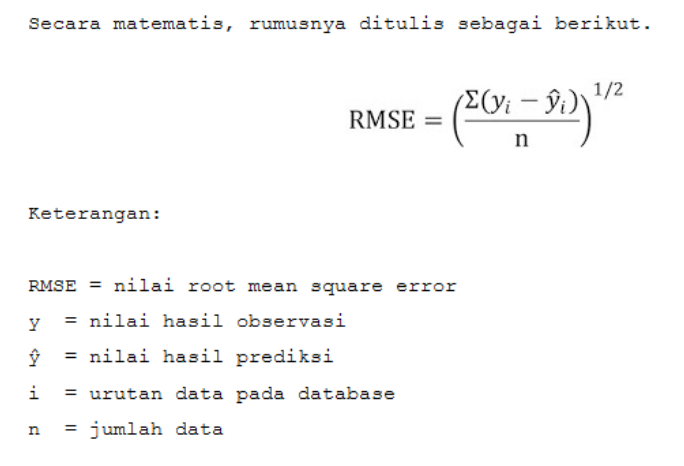# 

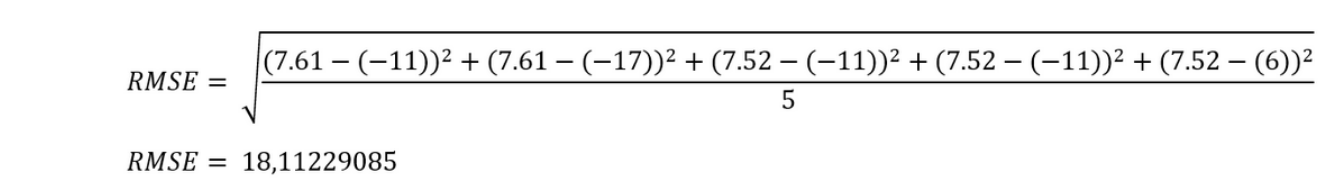# 

## K-Means Dataset Customers

In [196]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\BigData\\spark'

In [197]:
#mengimport modul yang dibutuhkan
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

#membuat session
appName = "Klastering di Spark"
spark = SparkSession \
    .builder \
    .appName(appName) \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [198]:
#memuat data dari file ke DataFrame dengan infer skema
customers = spark.read.csv(
    'Dataset/customers.csv', inferSchema=True, header=True)
customers.show(3)

+---------------+---+-------------+-----------+------+-------------+--------------+---------+----------+---------+----+
|   CustomerName|Age|MaritalStatus|IncomeRange|Gender|TotalChildren|ChildrenAtHome|Education|Occupation|HomeOwner|Cars|
+---------------+---+-------------+-----------+------+-------------+--------------+---------+----------+---------+----+
|    Aaron Adams| 42|            0|      50000|     0|            0|             0|        3|         2|        1|   1|
|Aaron Alexander| 40|            1|      50000|     0|            0|             0|        2|         2|        1|   2|
|    Aaron Allen| 63|            0|      25000|     0|            2|             1|        2|         1|        1|   2|
+---------------+---+-------------+-----------+------+-------------+--------------+---------+----------+---------+----+
only showing top 3 rows



In [199]:
#membuat assembler untuk mengubah fitur menjadi satu kolom fitur
assembler = VectorAssembler(inputCols = [
    "Age", "MaritalStatus", "IncomeRange", "Gender", "TotalChildren", 
    "ChildrenAtHome", "Education", "Occupation", "HomeOwner", "Cars"], 
                            outputCol="features")
train = assembler.transform(customers).select('CustomerName', 'features')
train.show(truncate = False, n=3)

+---------------+----------------------------------------------+
|CustomerName   |features                                      |
+---------------+----------------------------------------------+
|Aaron Adams    |[42.0,0.0,50000.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0]|
|Aaron Alexander|[40.0,1.0,50000.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0]|
|Aaron Allen    |[63.0,0.0,25000.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0]|
+---------------+----------------------------------------------+
only showing top 3 rows



In [200]:
#mendefinisikan algoritma klastering
kmeans = KMeans(
    featuresCol=assembler.getOutputCol(), predictionCol="cluster", 
    k=5, seed=0)
#mentraining model dengan perintah ".fit()"
model = kmeans.fit(train)
print ("Model selesai dibuat!")

Model selesai dibuat!


In [201]:
# Mencari titik kluster
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[5.31013005e+01 4.17180014e-01 2.50000000e+04 4.80492813e-01
 1.41512663e+00 6.08487337e-01 2.31622177e+00 1.45448323e+00
 5.93086927e-01 1.11464750e+00]
[5.53417813e+01 5.72411296e-01 1.00000000e+05 4.97103548e-01
 2.54380883e+00 1.54272266e+00 3.46198407e+00 4.19116582e+00
 7.16509776e-01 1.94532947e+00]
[5.19737441e+01 5.26868545e-01 5.00000000e+04 4.93961141e-01
 1.34552774e+00 4.98337126e-01 3.23035183e+00 2.77927534e+00
 6.62699107e-01 1.14615789e+00]
[5.60711289e+01 5.83804487e-01 7.50000000e+04 5.03921211e-01
 2.17308043e+00 8.16706183e-01 3.73244574e+00 3.92759438e+00
 7.23326646e-01 1.38063104e+00]
[5.82794840e+01 6.22850123e-01 1.50000000e+05 4.79729730e-01
 2.07248157e+00 3.20638821e+00 3.41461916e+00 4.34705160e+00
 6.48648649e-01 3.10995086e+00]


In [202]:
#melakukan prediksi klaster

prediction = model.transform(train)
prediction.groupBy("cluster").count().orderBy("cluster").show()
prediction.select('CustomerName', 'cluster').show(5)#menampilkan 5 data hasil prediksi

+-------+-----+
|cluster|count|
+-------+-----+
|      0| 2922|
|      1| 2762|
|      2| 5713|
|      3| 5483|
|      4| 1628|
+-------+-----+

+---------------+-------+
|   CustomerName|cluster|
+---------------+-------+
|    Aaron Adams|      2|
|Aaron Alexander|      2|
|    Aaron Allen|      0|
|    Aaron Baker|      2|
|   Aaron Bryant|      3|
+---------------+-------+
only showing top 5 rows



# K-means File Excel

 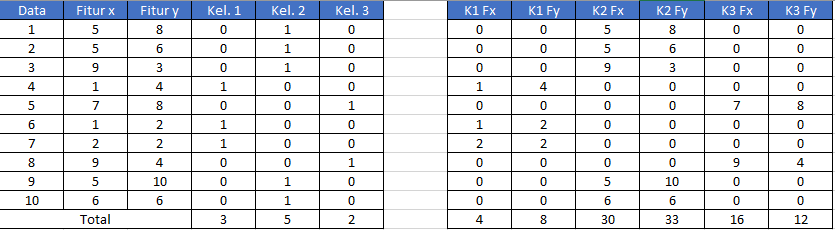

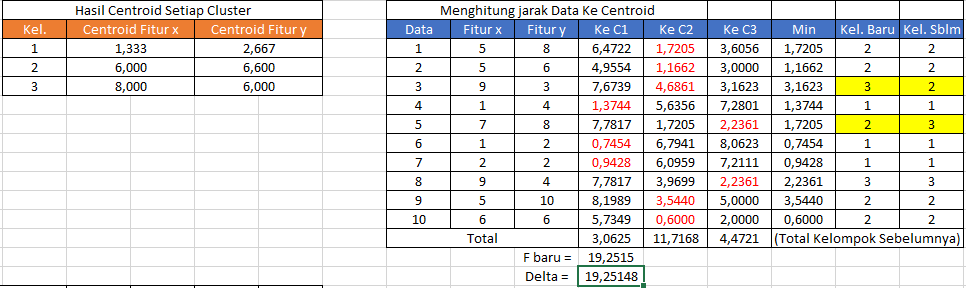

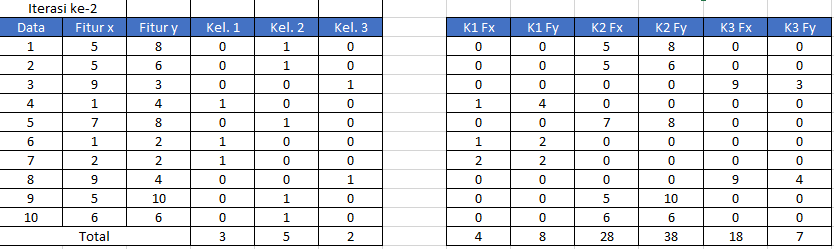

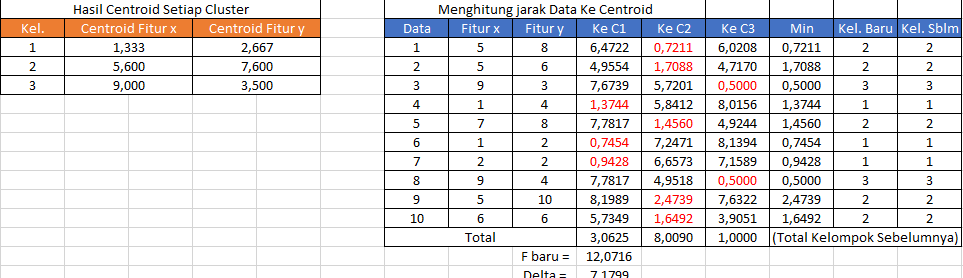

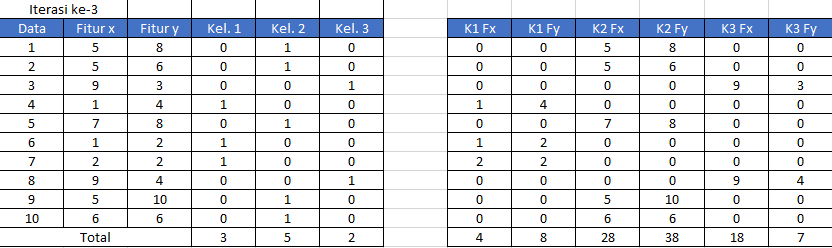

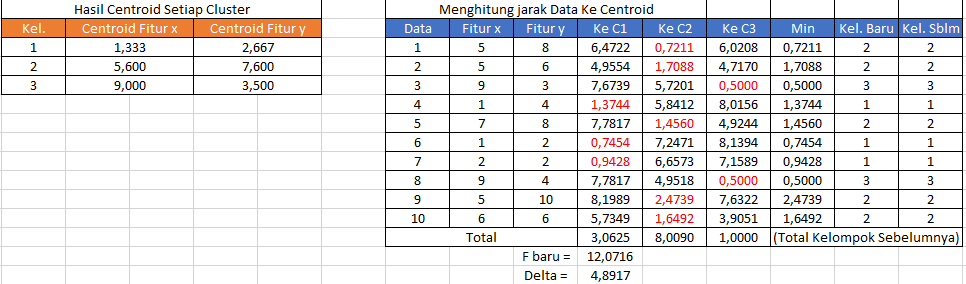

# NBC - Kategorial

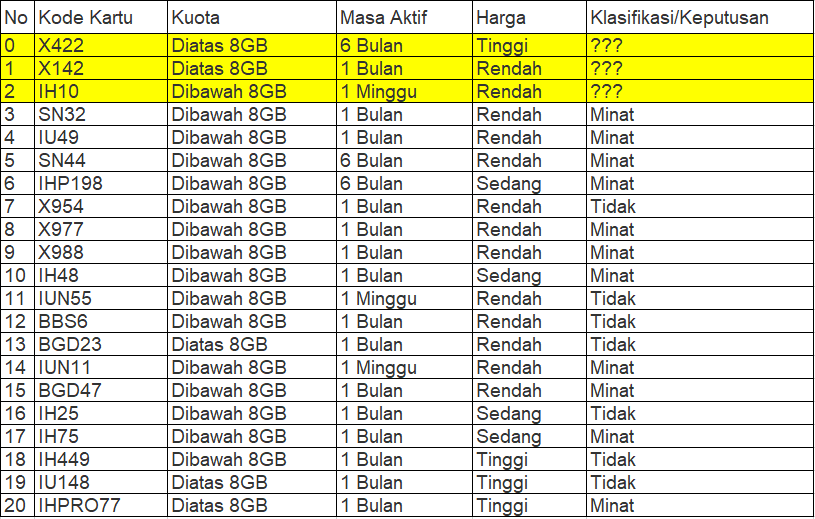

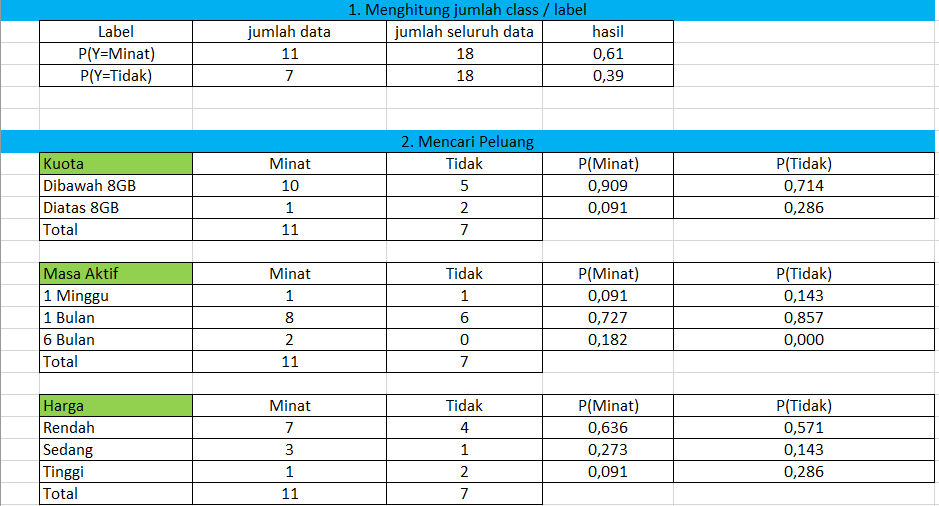

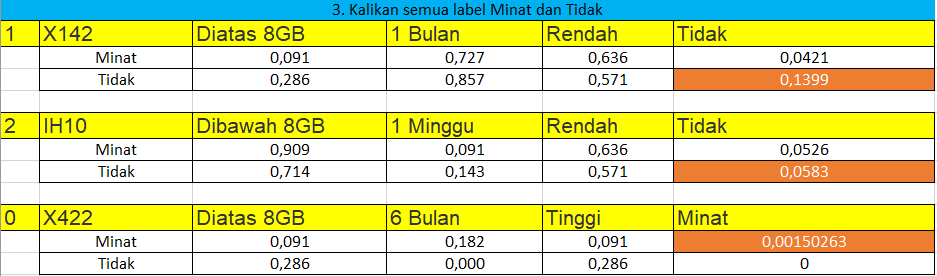

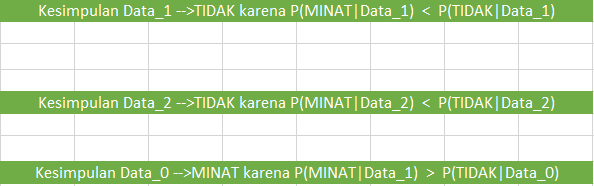

# NBC Kontinyu

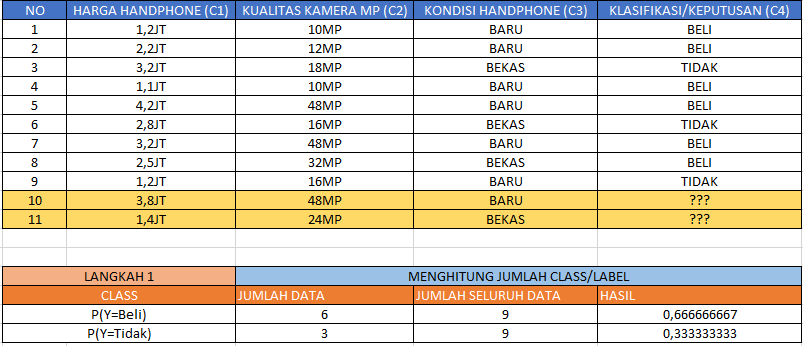

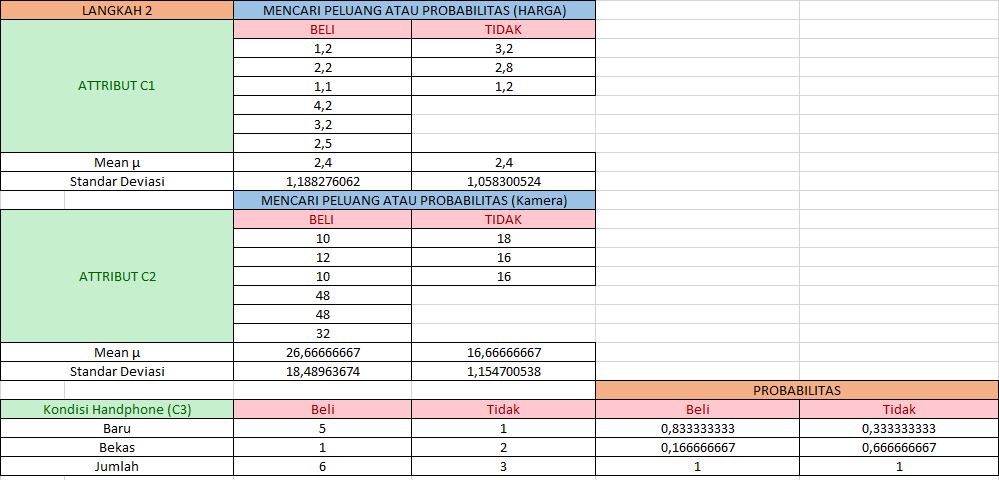

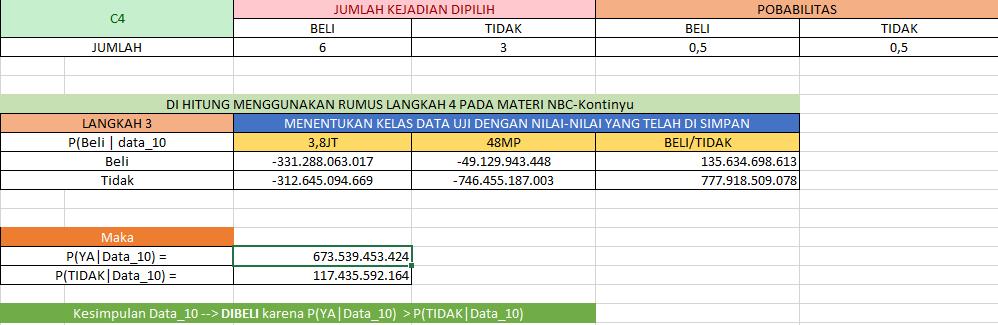

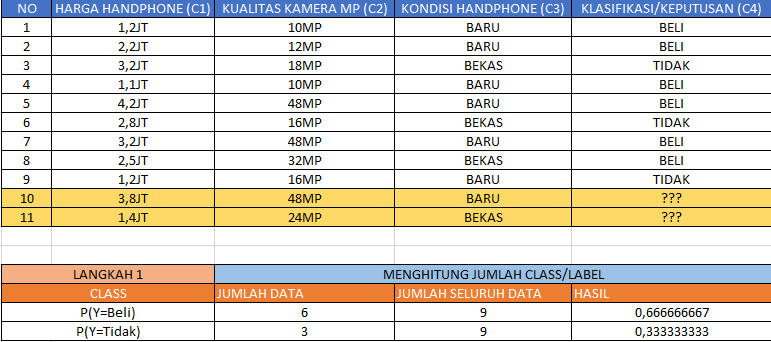

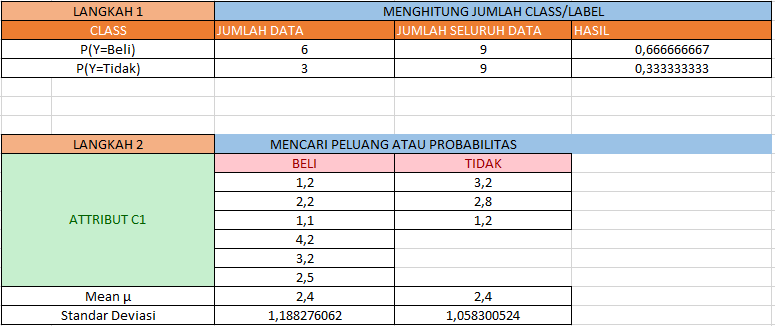

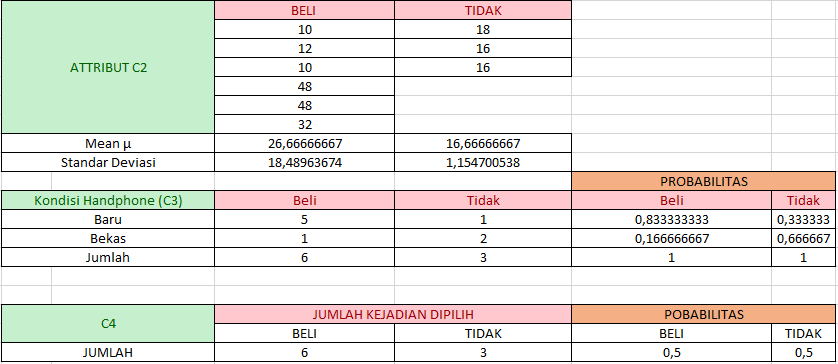

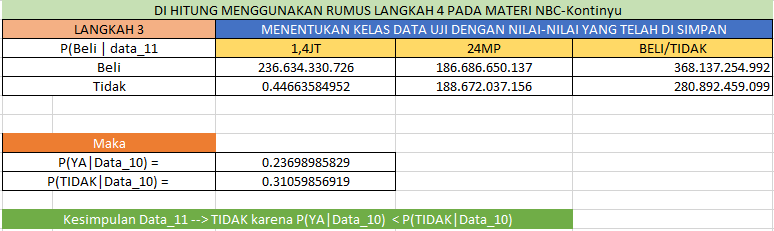